In [ ]:
pwd

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [ ]:
Ts = pd.read_csv('time_series_19-covid-Confirmed.csv')

In [ ]:
Ts

In [ ]:
Ts.shape

In [ ]:
col = Ts.shape[1]
col
Ts.iloc[156,0]

In [ ]:
LastDay = Ts.columns[-1]

In [ ]:
Top_Reg = Ts.nlargest(20,LastDay)

Last_Date = []
col = Ts.shape[1]
for index, row in Ts.iterrows():
    if row[1] == 'China':
        dic = {'region':row[0],'case':row[col-1]}
    else:
        dic = {'region':row[1],'case':row[col-1]}
    Last_Date.append(dic)
Last_Date
Top_Reg = pd.DataFrame.from_dict(Last_Date).nlargest(15,['case'])

In [ ]:
Top_Reg

In [ ]:
list(Top_Reg.columns)[4]

In [ ]:
Top_Dic = []
for index, row in Top_Reg.iterrows():
    for i in range(4,col):
        if row[1] == 'China':
            dic = {'Region' : row[0], 'Case' : row[i],'Date' : i-4}
        else:
            dic = {'Region' : row[1], 'Case' : row[i],'Date' : i-4}
        Top_Dic.append(dic)
Top_Df = pd.DataFrame.from_dict(Top_Dic)
Top_Df

In [ ]:
Top_No_Hubei = Top_Df[Top_Df['Region'] != 'Hubei']
Top_No_Hubei

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x = Top_No_Hubei['Date'], y = Top_No_Hubei['Case'], hue = Top_No_Hubei['Region'])
plt.tight_layout()

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x = Top_Df['Date'], y = Top_Df['Case'], hue = Top_Df['Region'])
plt.tight_layout()

In [ ]:
TopEuo_Dic = []
for index, row in Top_Reg.iterrows():
    for i in range(34,col):
        if row[1] == 'China':
            continue 
        else:
            dic = {'Region' : row[1], 'Case' : row[i],'Date' : i-4}
        TopEuo_Dic.append(dic)
TopEuo_Df = pd.DataFrame.from_dict(TopEuo_Dic)
TopEuo_Df

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x = TopEuo_Df['Date'], y = TopEuo_Df['Case'], hue = TopEuo_Df['Region'])
plt.tight_layout()

## Start from 20 cases

In [ ]:
Start_Dic = []
for index, row in Top_Reg.iterrows():
    Date = 0
    for i in range(4,col):
        if row[i] >= 40:
            if row[1] == 'China':
                dic = {'Region' : row[0], 'Case' : row[i],'Date' : Date} 
            else:
                dic = {'Region' : row[1], 'Case' : row[i],'Date' : Date}
            Date = Date + 1
            Start_Dic.append(dic)
        else:
            continue
Start_Df = pd.DataFrame.from_dict(Start_Dic)
Start_Df

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x = Start_Df['Date'], y = Start_Df['Case'], hue = Start_Df['Region'])
plt.tight_layout()

# The final function that does everything above

In [7]:
def PlotTrend(FileName = 'time_series_19-covid-Confirmed.csv', Top = 20, Hubei = False, China = True, Start = 20):
    
    # This function will plot the confirmed cases in the toppest 'Top' regions according to the cases in the last date.
    # Data is from the JHU Github repository https://github.com/CSSEGISandData/COVID-19, so FileName is by default the .csv from there
    # 'Top' defines how many regions you want to include, 'Hubei' defines whether to include the data from Hubei, 
    # 'China' defines whether to include data from China. if 'Start' is False then plots will start from the first reported cases 
    # to the lasted date, if a value is given to 'Start', then the plot will start from 'Day 0', which is the date that the cases 
    # in each region exceeds the value 'Start'
    
    Ts = pd.read_csv(FileName)
    col = Ts.shape[1]
    LastDay = Ts.columns[-1]
    Top_Reg = Ts.nlargest(Top,LastDay)
    
    if China == False:
        Hubei = False # Make sure Hubei is False if 'China' is defined as False. 
    
    Dic = []
    for index, row in Top_Reg.iterrows():
        if Start != False:
            label = 'Date from cases >= ' + str(Start)
            Date = 0
            for i in range(4,col):
                if row[i] >= Start:
                    if row[1] == 'China':
                        if China == True:
                            dic = {'Region' : row[0], 'Case' : row[i],'Date' : Date}
                        else: 
                            continue 
                    else:
                        dic = {'Region' : row[1], 'Case' : row[i],'Date' : Date}
                    Date = Date + 1
                    Dic.append(dic)
                else:
                    continue
        else:
            label = 'Date from 1/22/2020'
            for i in range(4,col):
                if row[1] == 'China':
                    if China == True:
                        dic = {'Region' : row[0], 'Case' : row[i],'Date' : i-4}
                    else: 
                        continue 
                else:
                    dic = {'Region' : row[1], 'Case' : row[i],'Date' : i-4}
                Dic.append(dic)
            
    Df = pd.DataFrame.from_dict(Dic)
    
    if Hubei == False:
        Df = Df[Df['Region'] != 'Hubei']
    
    plt.figure(figsize=(16, 6))
    sns.lineplot(x = Df['Date'], y = Df['Case'], hue = Df['Region'])
    plt.xlabel(label)
    plt.ylabel('Cases')
    plt.tight_layout()
    plt.suptitle('Confirmed cases in the top ' + str(Top) + ' regions',  y=1.05, fontsize=18)
    if China == False:
        C_label = ' hiden; '
    else:
        C_label = 'included; '
    if Hubei == False:
        H_label = ' hiden '
    else:
        H_label = 'included'
    plt.title('China is' + C_label + ' Hubei is'+ H_label, fontsize=10)
    plt.legend(loc = 2)

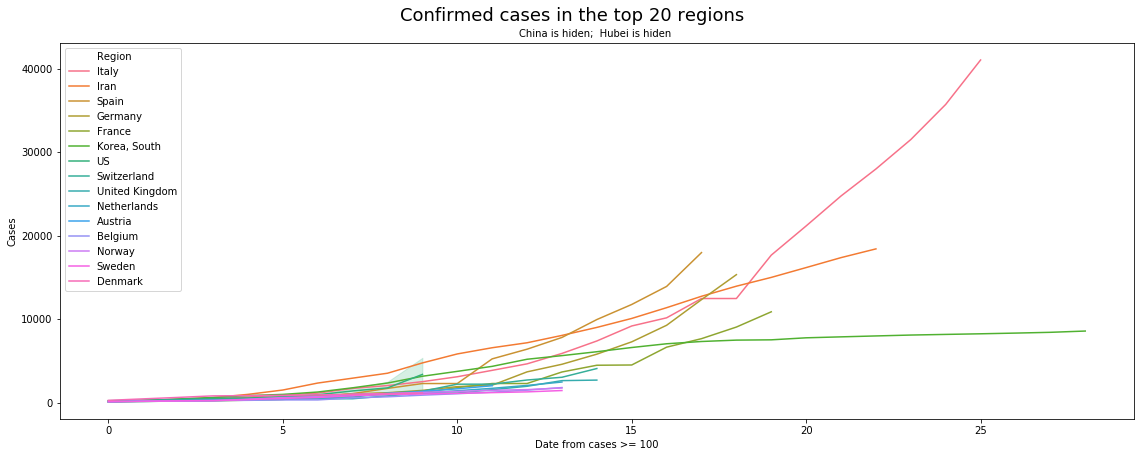

In [8]:
PlotTrend(Top = 20, China = False, Start = 100)

In [5]:
def PlotTrend_Con_InA(FileName = 'time_series_19-covid-Confirmed.csv', Top = 20, Hubei = False, China = True, Start = 20):
    
    # This function will plot the confirmed cases in the toppest 'Top' regions according to the cases in the last date.
    # Data is from the JHU Github repository https://github.com/CSSEGISandData/COVID-19, so FileName is by default the .csv from there
    # 'Top' defines how many regions you want to include, 'Hubei' defines whether to include the data from Hubei, 
    # 'China' defines whether to include data from China. if 'Start' is False then plots will start from 1/22/2020  
    # to the lasted date, if a value is given to 'Start', then the plot will start from 'Day 0', which is the date that the cases 
    # in each region exceeds the value 'Start'
    
    Ts = pd.read_csv(FileName)
    col = Ts.shape[1]
    LastDay = Ts.columns[-1]
    Top_Reg = Ts.nlargest(Top,LastDay)
    
    if China == False:
        Hubei = False # Make sure Hubei is False if 'China' is defined as False. 
    
    Dic = []
    for index, row in Top_Reg.iterrows():
        if Start != False:
            label = 'Date from cases >= ' + str(Start)
            Date = 0
            for i in range(4,col):
                if row[i] >= Start:
                    if row[1] == 'China':
                        if China == True:
                            dic = {'Region' : row[0], 'Case' : row[i],'Date' : Date}
                        else: 
                            continue 
                    else:
                        dic = {'Region' : row[1], 'Case' : row[i],'Date' : Date}
                    Date = Date + 1
                    Dic.append(dic)
                else:
                    continue
        else:
            label = 'Date from 1/22/2020'
            for i in range(4,col):
                if row[1] == 'China':
                    if China == True:
                        dic = {'Region' : row[0], 'Case' : row[i],'Date' : i-4}
                    else: 
                        continue 
                else:
                    dic = {'Region' : row[1], 'Case' : row[i],'Date' : i-4}
                Dic.append(dic)
            
    Df = pd.DataFrame.from_dict(Dic)
    
    if Hubei == False:
        Df = Df[Df['Region'] != 'Hubei']
    
    if China == False:
        C_label = ' hiden; '
    else:
        C_label = ' included; '
    if Hubei == False:
        H_label = ' hiden'
    else:
        H_label = ' included'
    
    Title =  'Confirmed cases in the top ' + str(Top) + ' regions (China is' + C_label + ' Hubei is'+ H_label + ')'
    
    fig = px.line(x = Df['Date'], y = Df['Case'], color = Df['Region'],title = Title, labels={'x':label, 'y':"Confirmed cases"})
    fig.show()

In [6]:
PlotTrend_Con_InA(Top = 20, China = False, Hubei = False, Start = 100)

In [ ]:
def PlotTrend_XT_InA(FileName = 'time_series_19-covid-Deaths.csv', Top = 20, Hubei = True, China = True, Start = 1):
    
    # This function will plot the death cases in the toppest 'Top' regions according to the cases in the last date.
    # Data is from the JHU Github repository https://github.com/CSSEGISandData/COVID-19, so FileName is by default the .csv from there
    # 'Top' defines how many regions you want to include, 'Hubei' defines whether to include the data from Hubei, 
    # 'China' defines whether to include data from China. if 'Start' is False then plots will start from 1/22/2020 
    # to the lasted date, if a value is given to 'Start', then the plot will start from 'Day 0', which is the date that the cases 
    # in each region exceeds the value 'Start'
    
    Ts = pd.read_csv(FileName)
    col = Ts.shape[1]
    LastDay = Ts.columns[-1]
    Top_Reg = Ts.nlargest(Top,LastDay)
    
    if China == False:
        Hubei = False # Make sure Hubei is False if 'China' is defined as False. 
    
    Dic = []
    for index, row in Top_Reg.iterrows():
        if Start != False:
            label = 'Date from cases >= ' + str(Start)
            Date = 0
            for i in range(4,col):
                if row[i] >= Start:
                    if row[1] == 'China':
                        if China == True:
                            dic = {'Region' : row[0], 'Case' : row[i],'Date' : Date}
                        else: 
                            continue 
                    else:
                        dic = {'Region' : row[1], 'Case' : row[i],'Date' : Date}
                    Date = Date + 1
                    Dic.append(dic)
                else:
                    continue
        else:
            label = 'Date from 1/22/2020'
            for i in range(4,col):
                if row[1] == 'China':
                    if China == True:
                        dic = {'Region' : row[0], 'Case' : row[i],'Date' : i-4}
                    else: 
                        continue 
                else:
                    dic = {'Region' : row[1], 'Case' : row[i],'Date' : i-4}
                Dic.append(dic)
            
    Df = pd.DataFrame.from_dict(Dic)
    
    if Hubei == False:
        Df = Df[Df['Region'] != 'Hubei']
    
    if China == False:
        C_label = ' hiden; '
    else:
        C_label = ' included; '
    if Hubei == False:
        H_label = ' hiden'
    else:
        H_label = ' included'
    
    Title =  'Death cases in the top ' + str(Top) + ' regions (China is' + C_label + ' Hubei is'+ H_label + ')'
    
    fig = px.line(x = Df['Date'], y = Df['Case'], color = Df['Region'],title = Title, labels={'x':label, 'y':"Death"})
    fig.show()

In [ ]:
PlotTrend_XT_InA(Top = 20, China = True, Hubei = True, Start = 1)

In [ ]:
def PlotTrend_Esti_InA(FileName = 'time_series_19-covid-Deaths.csv', Top = 20, Hubei = False, China = True, Start = 1, FR = 0.02):
    
    # This function will plot the estimated cases from death and death rate in the toppest 'Top' regions according to the cases in the last date.
    # Data is from the JHU Github repository https://github.com/CSSEGISandData/COVID-19, so FileName is by default the .csv from there
    # 'Top' defines how many regions you want to include, 'Hubei' defines whether to include the data from Hubei, 
    # 'China' defines whether to include data from China. if 'Start' is False then plots will start from 1/22/2020 
    # to the lasted date, if a value is given to 'Start', then the plot will start from 'Day 0', which is the date that the cases 
    # in each region exceeds the value 'Start'
    
    Ts = pd.read_csv(FileName)
    col = Ts.shape[1]
    LastDay = Ts.columns[-1]
    Top_Reg = Ts.nlargest(Top,LastDay)
    
    if China == False:
        Hubei = False # Make sure Hubei is False if 'China' is defined as False. 
    
    Dic = []
    for index, row in Top_Reg.iterrows():
        if Start != False:
            label = 'Date from cases >= ' + str(Start)
            Date = 0
            for i in range(4,col):
                if row[i] >= Start:
                    if row[1] == 'China':
                        if China == True:
                            dic = {'Region' : row[0], 'Case' : row[i] / FR,'Date' : Date}
                        else: 
                            continue 
                    else:
                        dic = {'Region' : row[1], 'Case' : row[i] / FR,'Date' : Date}
                    Date = Date + 1
                    Dic.append(dic)
                else:
                    continue
        else:
            label = 'Date from 1/22/2020'
            for i in range(4,col):
                if row[1] == 'China':
                    if China == True:
                        dic = {'Region' : row[0], 'Case' : row[i] / FR,'Date' : i-4}
                    else: 
                        continue 
                else:
                    dic = {'Region' : row[1], 'Case' : row[i] / FR,'Date' : i-4}
                Dic.append(dic)
            
    Df = pd.DataFrame.from_dict(Dic)
    
    if Hubei == False:
        Df = Df[Df['Region'] != 'Hubei']
    
    if China == False:
        C_label = ' hiden; '
    else:
        C_label = ' included; '
    if Hubei == False:
        H_label = ' hiden'
    else:
        H_label = ' included'
    
    Title =  'Estimated cases from ' + str(FR*100) + '% death rate in the top ' + str(Top) + ' regions (China is' + C_label + ' Hubei is'+ H_label + ')'
    
    fig = px.line(x = Df['Date'], y = Df['Case'], color = Df['Region'],title = Title, labels={'x':label, 'y':"Estimated cases"})
    #PlotTrend_Con_InA(Top = Top, China = China, Hubei = Hubei, Start = Start)
    fig.show()

In [ ]:
PlotTrend_Esti_InA(Top = 20, China = True, Hubei = True, Start = 2, FR = 0.05)

In [ ]:
def PlotTrend_Esti_Con_InA(FileName1 = 'time_series_19-covid-Confirmed.csv', FileName2 = 'time_series_19-covid-Deaths.csv', 
                           Top = 20, Hubei = False, China = True, Start = 1, FR = 0.02):
    
    # This function will plot the estimated cases from death and death rate in the toppest 'Top' regions according to the cases in the last date.
    # Data is from the JHU Github repository https://github.com/CSSEGISandData/COVID-19, so FileName is by default the .csv from there
    # 'Top' defines how many regions you want to include, 'Hubei' defines whether to include the data from Hubei, 
    # 'China' defines whether to include data from China. if 'Start' is False then plots will start from 1/22/2020 
    # to the lasted date, if a value is given to 'Start', then the plot will start from 'Day 0', which is the date that the cases 
    # in each region exceeds the value 'Start'
    
    Ts_Con = pd.read_csv(FileName1)
    Ts_XT = pd.read_csv(FileName2)
    col = Ts_Con.shape[1]
    LastDay = Ts_Con.columns[-1]
    Top_Reg = Ts_Con.nlargest(Top,LastDay)
    
    if China == False:
        Hubei = False # Make sure Hubei is False if 'China' is defined as False. 
    
    Dic = []
    for index, row in Top_Reg.iterrows():
        if Start != False:
            label = 'Date from cases >= ' + str(Start)
            Date = 0
            for i in range(4,col):
                if row[i] >= Start:
                    if row[1] == 'China':
                        if China == True:
                            dic = {'Region' : row[0], 'Case' : row[i],'Date' : Date, 
                                   'Estimated' : Ts_XT[Ts_XT['Province/State'] == row[0]].iloc[0,i] / FR}
                        else: 
                            continue 
                    else:
                        dic = {'Region' : row[1], 'Case' : row[i],'Date' : Date,
                              'Estimated' : Ts_XT[Ts_XT['Country/Region'] == row[1]].iloc[0,i] / FR}
                    Date = Date + 1
                    Dic.append(dic)
                else:
                    continue
        else:
            label = 'Date from 1/22/2020'
            for i in range(4,col):
                if row[1] == 'China':
                    if China == True:
                        dic = {'Region' : row[0], 'Case' : row[i],'Date' : i-4,
                              'Estimated' : Ts_XT[Ts_XT['Province/State'] == row[0]].iloc[0,i] / FR}
                    else: 
                        continue 
                else:
                    dic = {'Region' : row[1], 'Case' : row[i],'Date' : i-4,
                          'Estimated' : Ts_XT[Ts_XT['Province/State'] == row[0]].iloc[0,i] / FR}
                Dic.append(dic)
            
    Df = pd.DataFrame.from_dict(Dic)
    
    if Hubei == False:
        Df = Df[Df['Region'] != 'Hubei']
    
    if China == False:
        C_label = ' hiden; '
    else:
        C_label = ' included; '
    if Hubei == False:
        H_label = ' hiden'
    else:
        H_label = ' included'
    
    Title =  'Estimated cases from ' + str(FR*100) + '% death rate in the top ' + str(Top) + ' regions (China is' + C_label + ' Hubei is'+ H_label + ')'
    
    fig = px.line(x = Df['Date'], y = Df['Case'], color = Df['Region'],title = Title, labels={'x':label, 'y':"Estimated cases"})
    fig.show()

Ts_XT = pd.read_csv('time_series_19-covid-Deaths.csv')
Ts_Con = pd.read_csv('time_series_19-covid-Confirmed.csv')
Ts_XT.shape
